# Regression tests

## Load libraries

In [1]:
import sys
sys.path.append('/home/ccc/IAD/pw-deep-learning')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.sigmoid_activation import SigmoidActivation
from src.linear_activation import LinearActivation
from src.relu_activation import ReLUActivation
from src.network import Network
from src.log_error import LogError
from src.mean_squared_error import MeanSquaredError
from src.mean_absolute_error import MeanAbsoluteError
from src.relu_activation import ReLUActivation
from src import utils
from src import VisualizeNN as VisNN

# Cube datasets

In [3]:
sizes = ['100', '500', '1000', '10000']
datasets_cube = [('data.cube.train.' + size + '.csv', 
                    'data.cube.test.' + size + '.csv') for size in sizes]
datasets_cube

[('data.cube.train.100.csv', 'data.cube.test.100.csv'),
 ('data.cube.train.500.csv', 'data.cube.test.500.csv'),
 ('data.cube.train.1000.csv', 'data.cube.test.1000.csv'),
 ('data.cube.train.10000.csv', 'data.cube.test.10000.csv')]

In [4]:
dataframes_cube = [(pd.read_csv('../data/regression/'+name[0]), 
                      pd.read_csv('../data/regression/'+name[1])) for name in datasets_cube]


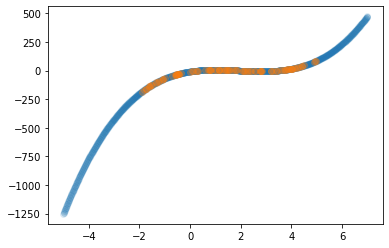

In [5]:
train_df, test_df = dataframes_cube[0]
plt.scatter(test_df['x'], test_df['y'], alpha=.1)
plt.scatter(train_df['x'], train_df['y'], alpha=.3)
plt.show()

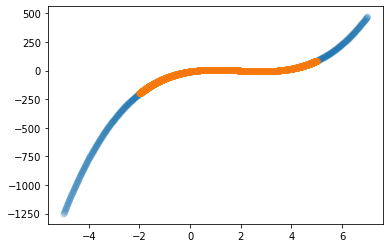

In [6]:
train_df, test_df = dataframes_cube[3]
plt.scatter(test_df['x'], test_df['y'], alpha=.1)
plt.scatter(train_df['x'], train_df['y'], alpha=.1)
plt.show()

In [7]:
len(train_df)

10000

## Define network architectures

In [30]:
def create_networks(seed):
    input_size = 1
    output_size = 1

    networks = []

    # No hidden layer, no bias
    layers = [(output_size, LinearActivation(), False)]

    networks.append(Network(input_size, layers, MeanSquaredError(), seed))

    # No hidden layer with bias
    layers = [(output_size, LinearActivation(), False)]

    networks.append(Network(input_size, layers, MeanAbsoluteError(), seed))

    # With hidden sigmoid layer, 4 neurons
    layers = [(4, SigmoidActivation(), True),
              (output_size, LinearActivation(), True)]

    networks.append(Network(input_size, layers, MeanSquaredError(), seed))

    # With hidden ReLU layer, 4 neurons
    layers = [(4, ReLUActivation(), True),
              (output_size, LinearActivation(), True)]

    networks.append(Network(input_size, layers, MeanSquaredError(), seed))

    # With 2 hidden sigmoid layers, 8, 4 neurons
    layers = [(8, SigmoidActivation(), True),
             (4, SigmoidActivation(), True),
            (output_size, LinearActivation(), True)]

    networks.append(Network(input_size, layers, MeanSquaredError(), seed))

     # With 3 hidden sigmoid layers, 8, 8, 8 neurons MAE
    layers = [(8, ReLUActivation(), True),
             (8, ReLUActivation(), True),
             (8, ReLUActivation(), True),
             (output_size, LinearActivation(), True)]

    networks.append(Network(input_size, layers, MeanAbsoluteError(), seed))


    # With 3 hidden sigmoid layers, 8, 8, 8 neurons MSE
    layers = [(8, ReLUActivation(), True),
             (8, ReLUActivation(), True),
             (8, ReLUActivation(), True),
             (output_size, LinearActivation(), True)]

    networks.append(Network(input_size, layers, MeanSquaredError(), seed))



    return networks

## Cube dataset (100)

In [9]:
normalization_scales = []
normalized_cube = []
for train_df, test_df in dataframes_cube:
    df_min, df_max = utils.get_normalisation_scale(train_df, True)
    normalization_scales.append((df_min, df_max))
    train_df = utils.normalized_dataset(train_df, df_min, df_max, True)
    test_df = utils.normalized_dataset(test_df, df_min, df_max, True)
    normalized_cube.append((train_df, test_df))

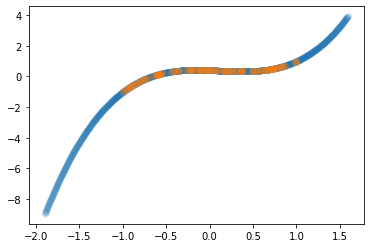

In [10]:
train_df, test_df = normalized_cube[0]
train_df.head()
plt.scatter(test_df['x'], test_df['y'], alpha=.1)
plt.scatter(train_df['x'], train_df['y'], alpha=.3)
plt.show()

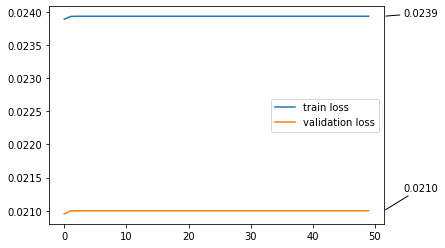

<Figure size 432x288 with 0 Axes>

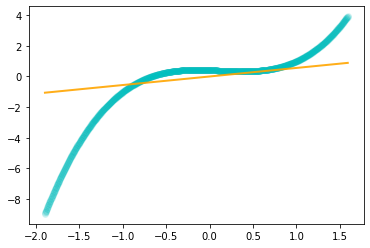

4.737869060298526


In [11]:
# 100
train_df, test_df = normalized_cube[0]
network = create_networks(1234)[0]
train_losses, validation_losses = utils.train_regression(network, train_df, 50, 0.3, 5)
utils.plot_loss(train_losses, validation_losses)
utils.plot_regression(network, test_df)
print(utils.calculate_mse(network, test_df))

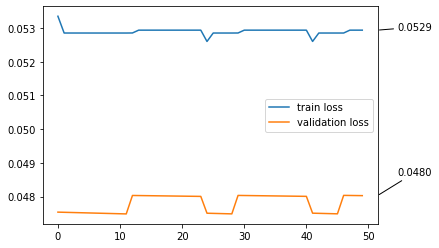

<Figure size 432x288 with 0 Axes>

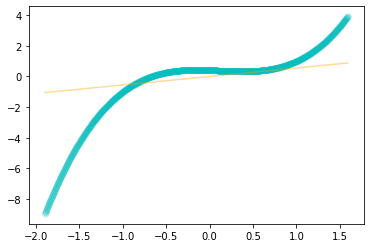

4.753887602198378


In [44]:
# 100
train_df, test_df = normalized_cube[0]
network = create_networks(1234)[1]
train_losses, validation_losses = utils.train_regression(network, train_df, 50, 0.3, 5)
utils.plot_loss(train_losses, validation_losses)
utils.plot_regression(network, test_df)
print(utils.calculate_mse(network, test_df))

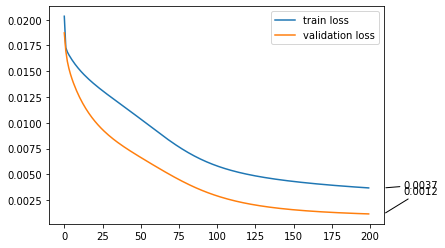

<Figure size 432x288 with 0 Axes>

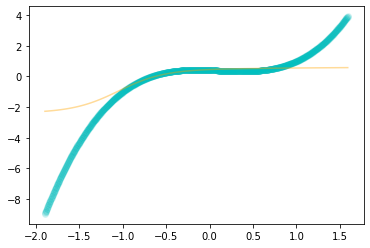

3.0970910948848127


In [47]:
# 100
train_df, test_df = normalized_cube[0]
network = create_networks(1234)[2]
train_losses, validation_losses = utils.train_regression(network, train_df, 200, 0.3, 5)
utils.plot_loss(train_losses, validation_losses)
utils.plot_regression(network, test_df)
print(utils.calculate_mse(network, test_df))

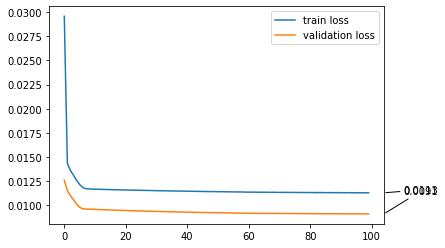

<Figure size 432x288 with 0 Axes>

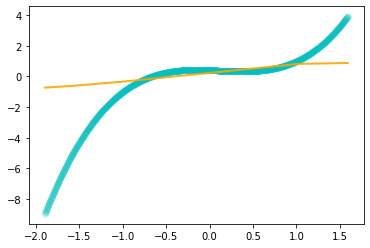

5.171211382195159


In [24]:
# 100
train_df, test_df = normalized_cube[0]
network = create_networks(1234)[3]
train_losses, validation_losses = utils.train_regression(network, train_df, 100, 0.1, 5)
utils.plot_loss(train_losses, validation_losses)
utils.plot_regression(network, test_df)
print(utils.calculate_mse(network, test_df))

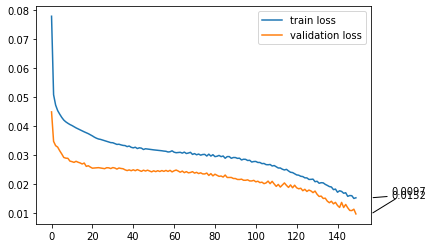

<Figure size 432x288 with 0 Axes>

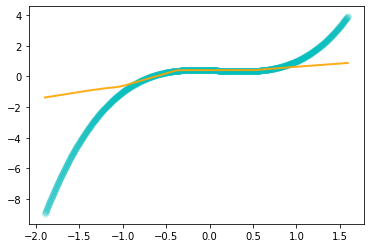

4.286506969231904
(2, 9)
(9, 9)
(9, 9)
(9, 2)
[(2, 9), (9, 9), (9, 9), (9, 2)] [2, 9, 9, 9, 1]


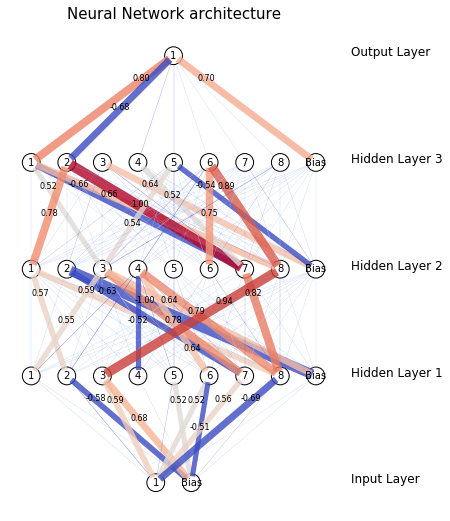

In [22]:
# 8-8-8-
train_df, test_df = normalized_cube[0]
network = create_networks(1234)[5]
train_losses, validation_losses = utils.train_regression(network, train_df, 150, 0.01, 5)
utils.plot_loss(train_losses, validation_losses)
utils.plot_regression(network, test_df)
print(utils.calculate_mse(network, test_df))
utils.draw_weights(network)

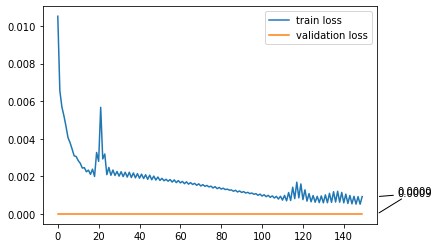

<Figure size 432x288 with 0 Axes>

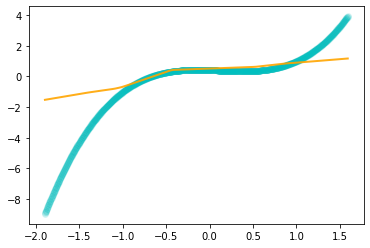

3.9473353313340676
(2, 9)
(9, 9)
(9, 9)
(9, 2)
[(2, 9), (9, 9), (9, 9), (9, 2)] [2, 9, 9, 9, 1]


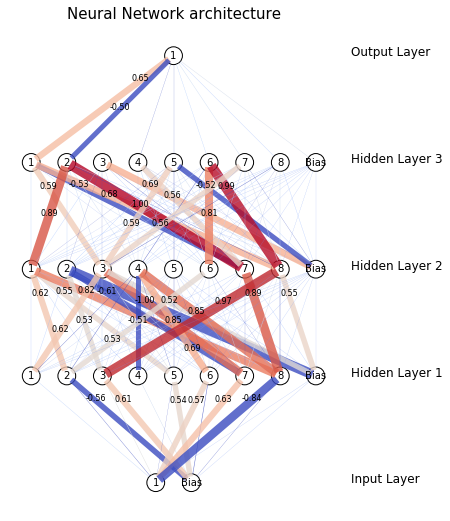

In [33]:
# 8-8-8-
train_df, test_df = normalized_cube[0]
network = create_networks(1234)[6]
train_losses, validation_losses = utils.train_regression(network, train_df, 150, 0.15, 20)
utils.plot_loss(train_losses, validation_losses)
utils.plot_regression(network, test_df)
print(utils.calculate_mse(network, test_df))
utils.draw_weights(network)